# Binary Trees

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

In [34]:
class TreeNode(object):
    """ A node of a binary tree """
    def __init__(self, data, left_child = None, right_child = None):
        self.data = data
        self.left = left_child
        self.right =right_child
    
    def traverse_infix(self, result = None):
        if result == None:
            result = []
            
        if self.left:
            self.left.traverse_infix(result)
            
        result.append(self.data)
        
        if self.right:
            self.right.traverse_infix(result)
            
        return result
    
    def traverse_prefix(self, result = None):
        if result == None:
            result = []
        
        result.append(self.data)
        
        if self.left:
            self.left.traverse_prefix(result)
            
        if self.right:
            self.right.traverse_prefix(result)    
            
        return result
   
    def traverse_postfix(self, result = None):
        if result == None:
            result = []
            
        if self.left:
            self.left.traverse_postfix(result)
                    
        if self.right:
            self.right.traverse_postfix(result)
            
        result.append(self.data)

        return result
 

In [35]:
# create a graphical representation of a binary tree (plot_tree uses plot_node)
def plot_node(node, level = 1, posx = 0, posy = 0):
    
    width = 2000.0 * (0.5**(level))
    plt.text(posx, posy, str(node.data), horizontalalignment='center',fontsize=10)
    
    if node.left:
        px = [posx, posx-width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-',hold=True)
        plot_node(node.left, level+1, posx-width, posy-20)
    
    if node.right:
        plot_node(node.right, level+1, posx+width, posy-20)
        px = [posx, posx+width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-',hold=True)

def plot_tree(node, figsize=(10,6)):
    rcParams['figure.figsize'] = figsize
    fig, ax = plt.subplots()
    ax.axis('off')
    plot_node(node)
    plt.show()


## Question 1
complete the following recursive function that prints the tree one node per row (in prefix order), with children indented by level

In [36]:
def print_tree(node, level = 0):
    print (level*'   ',node.data)
    if node.left:
        print_tree(node.left, level + 1)
        
    if node.right:
        print_tree(node.right, level + 1)

Infix:  ['a']
Infix:  ['c', '^', 'd']
Infix:  ['b', '*', 'c', '^', 'd']
Infix:  ['a', '+', 'b', '*', 'c', '^', 'd']
 +
    a
    *
       b
       ^
          c
          d


/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


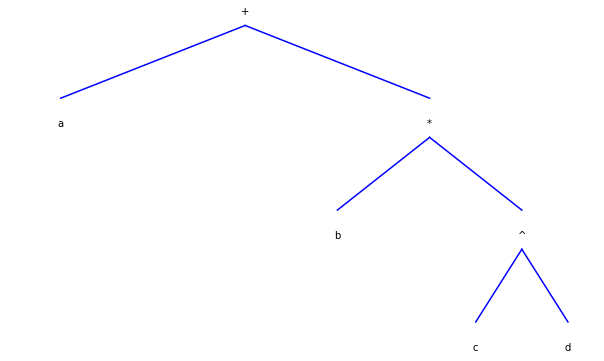

In [37]:
# generate tree for: a + b * c ^ d
a = TreeNode('a')
print ("Infix: ",a.traverse_infix())
b = TreeNode('b')
c = TreeNode('c')
d = TreeNode('d')
factor = TreeNode('^',c,d)
print ("Infix: ",factor.traverse_infix())
term = TreeNode('*',b,factor)
print ("Infix: ",term.traverse_infix())
expr = TreeNode('+',a,term)
print ("Infix: ",expr.traverse_infix())

print_tree(expr)
plot_tree(expr)

## Question 2
Generate the expression tree for ((a+b)*c)^d without parentheses

Infix ['a', '+', 'b', '*', 'c', '^', 'd']
Prefix ['^', '*', '+', 'a', 'b', 'c', 'd']
Postfix (RPN):  ['a', 'b', '+', 'c', '*', 'd', '^']


/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


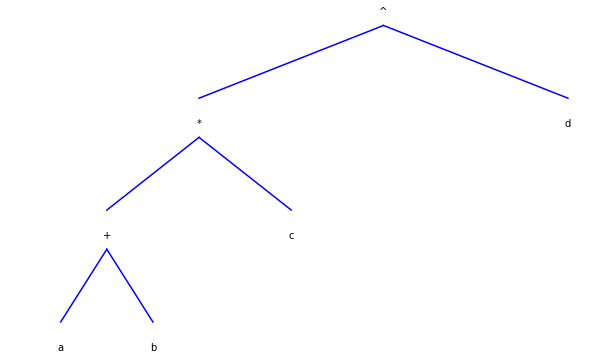

In [38]:
# ((a+b)*c)^d without parentheses
a = TreeNode('a')
b = TreeNode('b')
c = TreeNode('c')
d = TreeNode('d')

factor = TreeNode('+',a,b)
term = TreeNode('*', factor,c)
expr = TreeNode('^',term,d)


print ("Infix",expr.traverse_infix())
print ("Prefix", expr.traverse_prefix())
print ("Postfix (RPN): ", expr.traverse_postfix())

plot_tree(expr)

## Question 3: traversal
Implement the following function that returns an array with the objects in breadth first order by using a queue. Check your answer!

In [42]:
def traverse_breadth_first(node):

    from collections import deque
    q = deque()
    result = []

    # ????
    q.append(node)
    while len(q) > 0:
        p = q.popleft()
        result.append(p.data)
        if p.left:
            q.append(p.left)
        if p.right:
            q.append(p.right)
    return result
    
print ("breadth-first:", traverse_breadth_first(expr))

breadth-first: ['^', '*', 'd', '+', 'c', 'a', 'b']


Now implement the other traversal functions inside TreeNode and test them here:

infix: ['a', '+', 'b', '*', 'c', '^', 'd']
prefix: ['^', '*', '+', 'a', 'b', 'c', 'd']
postfix: ['a', 'b', '+', 'c', '*', 'd', '^']
breadth-first: ['^', '*', 'd', '+', 'c', 'a', 'b']


/usr/local/share/jupyterhub/env/jupyterhub/lib/python3.6/site-packages/matplotlib/pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


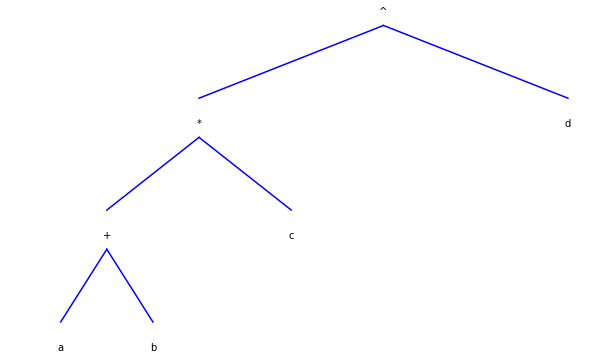

In [43]:
print ("infix:", expr.traverse_infix())
print ("prefix:", expr.traverse_prefix())
print ("postfix:", expr.traverse_postfix())
print ("breadth-first:", traverse_breadth_first(expr))
plot_tree(expr)

In [44]:
# Here is a print function that does in-order traversal and adds parenthesis (just run)

def print_eqn(node):
    if node.left or node.right:
        print ("(",end="")
    if node.left:
        print_eqn(node.left)
    print (node.data, end="")
    if node.right:
        print_eqn(node.right)
    if node.left or node.right:
        print (")",end="")
    
print_eqn(expr)

(((a+b)*c)^d)

## Question 4: evaluate an expression tree
if we plug in numbers for the variables a,b,c, and d, we can compute the result when traversing the tree (instead of just printing the nodes). Complete the compute() function that computes the result of a tree recursively and returns the result.

In [56]:
# we replace a,b,c,d by numbers:
a = TreeNode(2)
b = TreeNode(3)
c = TreeNode(4)
d = TreeNode(5)

factor = TreeNode('^',c,d)
term = TreeNode('*',b,factor)
expr = TreeNode('+',a,term)

print_eqn(expr)
print()

def compute(node):
    # ???
    if node.data == '^':
        return compute(node.left)**compute(node.right)
    elif node.data == '*':
        return compute(node.left)*compute(node.right)
    elif node.data == '+':
        return compute(node.left)+compute(node.right)
    else:
        return node.data
   
print (compute(factor))  # 1024 = 4 ^ 5
print (compute(expr))


(2+(3*(4^5)))
1024
3074
